<a href="https://colab.research.google.com/github/2pterons/training/blob/main/MachineLearning/%EA%B8%B0%EC%B4%88%ED%8E%B8_2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지난시간 복습
1. **머신러닝 알고리즘의 분류 3개**  
: 지도학습 | 비지도학습 | 강화학습  
- 지도학습 : 학습을 위해 훈련데이터에 입력과 타깃이 함께 제공 되어야한다. 즉, 훈련데이터에 문제와 정답이 함께 존재한다. 따라서 지도학습을 위해서는 알고자하는 문제의 정답이 있어야한다.  
- 비지도학습 : 타깃이 없거나 구할 수 없을 때 입력값만 가지고 사용하는 것.
- 강화학습 : 위 두개와는 다른 알고리즘으로 프로그램의 에이전트가 주어진 환경에서 수행하면서 얻어지는 보상을 최대화 하기 위해서 학습하는 모델
환경은 물리적 환경일 수도 있지만, 주로 소프트웨어적으로 주어지는 환경을 뜻한다.  
  
2. **데이터**  
우리는 지난 시간동안 도미와 빙어를 구분하는 문제를 풀어봤다.  
길이와 무게, 두개의 특성을 사용했었고 타깃은 **이진분류**의 경우 Yes/No, True/False, 1/0과 같이 OX퀴즈라고 볼 수 있다.  
이렇게 찾고자 하는 대상을 양성클래스(Positive Class)라고 하고 1로 표시하며, 찾고자 하는 대상이 아닌 경우 음성클래스(Nagative Class)라고 하고 0으로 표시하며 해당 이진 분류를 Targit 데이터로 만든다.  
대부분의 머신러닝 알고리즘은 이와 같은 방식으로 데이터를 주입하길 권장(?)하며 사이킷런과 텐서플로우도 마찬가지로 해당 방식의 데이터를 기대한다.  
우리가 사용한 데이터에서 도미와 빙어를 구분할 때 도미를 찾기 원한다면 도미를 1, 빙어를 찾길 원한다면 빙어를 1로 둔다. (즉, 찾고자 하는 대상이 양성클래스인 것이다. *따로 좋고 나쁘고가 있는 것이 아님.*)  
우리가 기억해야하는 것은 지난 시간에 배웠던 훈련 데이터셋과 테스트 데이터셋의 분류를 어떻게 진행했는가? 이다.  
훈련데이터로 다시 테스트를 진행하는 것은 옳지 못하다고 지난 시간에 말했을 것이다.  
따라서 올바른 구현이라고 평가 받기 위해서는 훈련에 사용하지 않은 데이터를 테스트에 사용하는 것이 당연하고 직관적이고 상식적인 것이다.  
때문에 우리는 훈련 데이터를 훈련세트로 상당부분을 활용하고 적당히 20% 정도를 테스트세트로 떨궈내서 사용했던 것이다.  
또한 훈련 세트와 테스트 세트를 분류할 때는 주의해야 할 점이 있는데 첫번째는 입력 데이터와 타깃 데이터가 잘못 섞이는 것을 방지하기 위해 인덱스값을 기준으로 섞는 방식을 사용하는 것이고  
두번째는 훈련데이터 세트 안에 빙어와 도미의 특성을 골고루 섞어 학습해야한다는 것이다. 만약 훈련데이터 세트에 기본데이터를 하나도 포함시키지 않고 모델을 훈련시키면 올바르게 예측을 할 수 없는 것과 같다. 이는 확률 통계를 가르치지 않고 확률 통계 문제를 내는 것과 같은 꼴이 될 수 있다.  
쉽게말해 학습 세트와 테스트 세트를 구분할 때 훈련 세트 안에 빙어 데이터와 도미 데이터가 모두 들어가 학습되어야 테스트에 공정한 평가가 가능하다는 것이다.  따라서 훈련세트에 클래스별 특성을 골고루 섞어주는 것이 중요하다.
클래스란 한쪽에 몰려있는 데이터끼리 분류된 집합을 말하며 **분류하려는 종류를 클래스**라고 한다.  
정리하자면 ** 훈련 세트 안에는 클래스 별 데이터가 모두 포함되어야한다 ** 라고 할 수 있다. 이와 반대 되는 경우, 즉 클래스가 특정 한두개 편중되어있는 것을 샘플링 편향 이라고한다.  
이런 샘플링 편향을 없애기 위해서 도미와 빙어를 골고루 잘 섞어서 나눠쓰자는 말이다.(휴)  
이 부분은 파이썬에서 수동으로 나눌 수 있지만, 우리는 지난시간 조금 더 전문적인 배열 라이브러리인 "넘파이(Numpy)"를 사용했었다.  
넘파이는 파이썬의 과학 생태계라고 말할 수 있다. (여러가지 라이브러리의 모음)  
라이브러리의 근간이 되는 것이 바로 배열을 다루는 넘파이이다.
매플러리, 사이파이 등 대부분의 라이브러리가 기반을 넘파이를 위에 두고 개발이 되었기 때문에 아주 중요한 라이브러라고 할 수 있다.  
파이썬에서 과학에 관련된 개발을 한다면 넘파이 배열을 사용한다고 보면 된다.  
  
3. 배열
1차원 배열 :
1차원 배열은 벡터라고 불리우며 1개의 축(가로)으로만 또는 열로만 구성된 집합을 말한다.
2차원 배열 :
2차원 배열은 2개의 축, 열과 행(가로/세로)으로 구성되어 있다.
3차원 배열 : 3차원 배열은 3개의 축으로 구성되어 열과 행으로 구성된 배열이 입체적으로 여러 겹 구성되어있다.  
우리는 주로 샘플을 행에 넣고 특성을 열에 넣는 2차원 배열을 훈련데이터로 많이 사용하고 있으며 입력 array와 타깃 array를 넘파이 배열로 만들었었다.  
앞서 말했던 것처럼 배열 자체를 섞지 말고 배열의 인덱스를 섞는 방법을 다시 한번 기억하자 입력 데이터와 타깃 데이터가 잘못 섞이는 것을 방지하기 위함이며 매우 중요하다. 
  
- 배열 슬라이싱  
: 인덱스 배열을 가지고 입력 데이터와 타깃 데이터를 선택하는 방식을 말한다.
넘파이는 파이썬 리스트에서 제공하는 일반적인 슬라이싱 연산자도 제공하지만 인덱스 배열을 통채로 집어 넣어 인덱스에 해당하는 원소를 뽑을 수 있는 배열 슬라이싱 기능도 제공하고 있다. 배열이 아주 크더라도 인덱스 배열만 만들어서 섞으면 되기 때문에 메모리에도 큰 부담이 없다는 장점이 있다.  
  





---

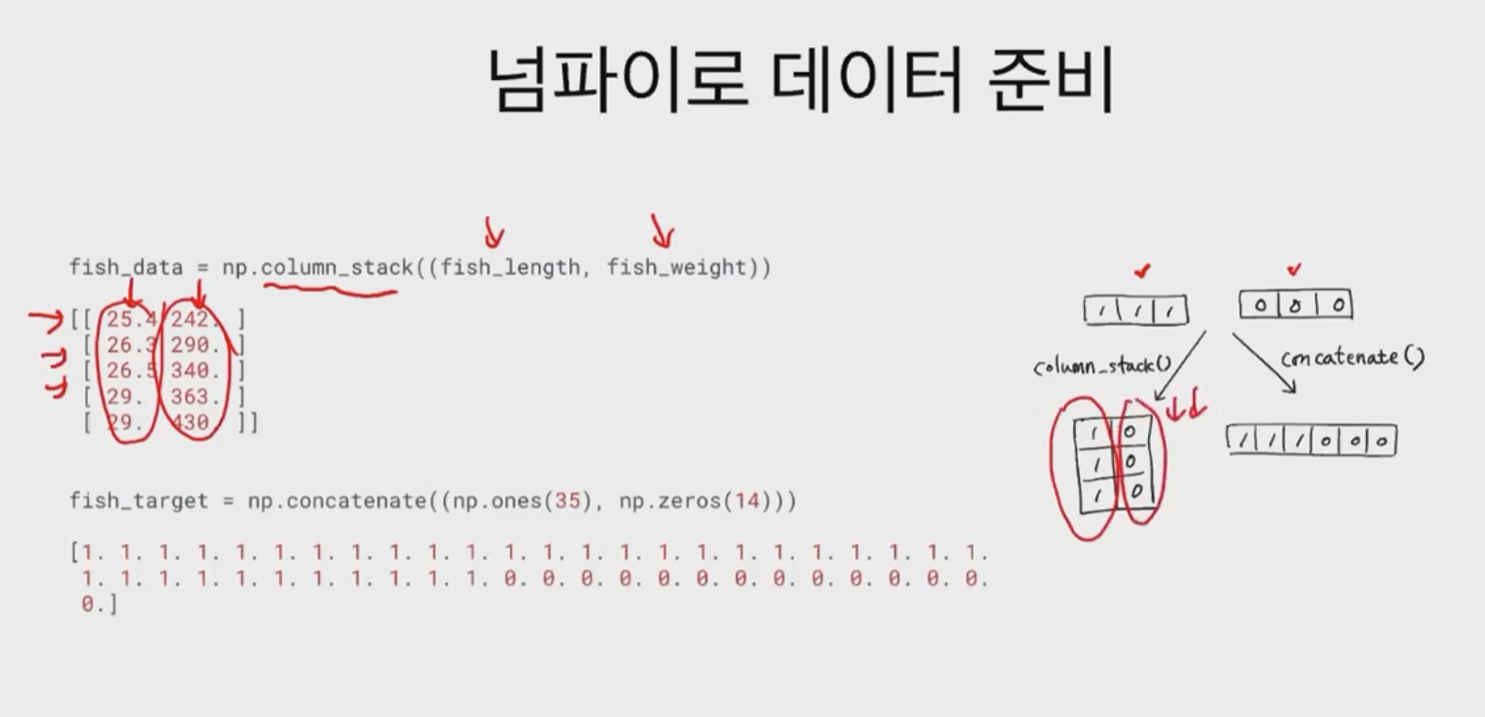

이전에는 fish_length와 fish_weight를 파이썬 리스트로 만들어 파이썬의 리싀트 내포를 사용하여 zip함수로 for문으로 돌려 두 리스트를 하나로 만들어 리스트의 리스트를 만들었었다.  
이번 시간에는 넘파이를 이용하여 조금 더 고급진 방법으로 하나로 합쳐보자.  
이전과 똑같이 샘플을 행에 두고 특성을 열에둔 2차원 배열을 만드는 것이 목적이다. 이를 위해 넘파이에서 제공하는 column_stack을 이용하자 column_stack은 주어진 두 배열을 나란히 세운 다음 차례대로 열로 붙여준다.
(비슷한 함수로 row_stack)이 존재한다. 이것은 행방향으로 쌓는다.)
우리는 특성을 열방향으로 쌓아야하기 때문에 을 사용한다.
추가로 concatenate()라는 함수는 가로방향으로(일렬로) 이어붙인다.

```
[[25.4 242.]
 [26.3 290.]
 [26.5 340.]
 [29.  363.]
 [29.  430.]]
```

In [ ]:
fish_data = np.colum_stack((fish_length, fish_weight))

In [ ]:
fish_target = np.condatenate((np.ones(35), np.zeros(14)))